MayurPD@ACPS

In [1]:
!nvidia-smi

Wed Apr 17 11:48:23 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.61                 Driver Version: 551.61         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   54C    P4             10W /   40W |    1495MiB /   6141MiB |     15%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 1.2 MB/s eta 0:00:00
  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached MarkupSafe-2.1.5-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB 991.0 kB/s eta 0:06:21
   ---------------------------------------- 0.2/377.0 MB 2.5 

In [11]:
pip install pillow

  Using cached pillow-10.3.0-cp311-cp311-win_amd64.whl.metadata (9.4 kB)
Using cached pillow-10.3.0-cp311-cp311-win_amd64.whl (2.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from PIL import Image
from IPython.display import display
import numpy as np
import glob as glob

In [13]:
train_path = 'D:/MAYURPD DOCS/SEM2/ACPS/PROJECT/CUSTOM TOMATO DATASET/MSDS-Iv3/train'
valid_path = 'D:/MAYURPD DOCS/SEM2/ACPS/PROJECT/CUSTOM TOMATO DATASET/MSDS-Iv3/test'

In [14]:
# Load your custom-trained InceptionV3 model
IMAGE_SIZE = [224, 224]

In [15]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 30s 0us/step


In [16]:
for layer in inception.layers:
    layer.trainable = False

In [18]:
folders = glob.glob('D:/MAYURPD DOCS/SEM2/ACPS/PROJECT/CUSTOM TOMATO DATASET/MSDS-Iv3/train/*')
folders

['D:/MAYURPD DOCS/SEM2/ACPS/PROJECT/CUSTOM TOMATO DATASET/MSDS-Iv3/train\\Tomato_Diseased',
 'D:/MAYURPD DOCS/SEM2/ACPS/PROJECT/CUSTOM TOMATO DATASET/MSDS-Iv3/train\\Tomato_Healthy',
 'D:/MAYURPD DOCS/SEM2/ACPS/PROJECT/CUSTOM TOMATO DATASET/MSDS-Iv3/train\\Tomato_Stressed']

In [19]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)
custom_inception_model = Model(inputs=inception.input, outputs=prediction)
custom_inception_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
custom_inception_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,956,387 (83.76 MB)

 Trainable params: 153,603 (600.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [20]:
# Define class names for YOLOv8
class_names_yolo = ['Bacterial Spot_Stage-1', 'Bacterial Spot_Stage-2', 'Bacterial Spot_Stage-3',
                    'Early Blight_Stage-1', 'Early Blight_Stage-2', 'Early Blight_Stage-3',
                    'Late Blight_Stage-1', 'Late Blight_Stage-2', 'Late Blight_Stage-3',
                    'Leaf_Mould', 'Septoria Spot_Stage-1', 'Septoria Spot_Stage-2', 'Septoria Spot_Stage-3']

In [21]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/MAYURPD DOCS/SEM2/ACPS/PROJECT/CUSTOM TOMATO DATASET/MSDS-Iv3/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2181 images belonging to 3 classes.


In [23]:
test_set = test_datagen.flow_from_directory('D:/MAYURPD DOCS/SEM2/ACPS/PROJECT/CUSTOM TOMATO DATASET/MSDS-Iv3/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 25 images belonging to 3 classes.


In [24]:
# fit the model
# Run the cell. It will take some time to execute
r = custom_inception_model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

AttributeError: 'Functional' object has no attribute 'fit_generator'

1/1 [==============================] - 0s 63ms/step
Accuracy: 84.0 %


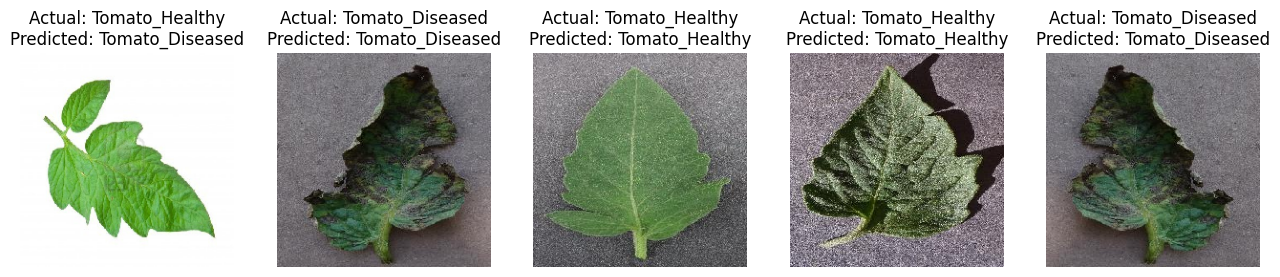

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names based on your dataset
class_names = ['Tomato_Diseased', 'Tomato_Healthy', 'Tomato_Stressed']

# Get a batch of validation images and their labels
images, labels = next(test_set)

# Predict the labels for the validation images
predicted_labels = custom_inception_model.predict(images)

# Define a function to decode the one-hot encoded labels
def decode_label(label):
    return class_names[np.argmax(label)]

# Calculate accuracy
def calculate_accuracy(labels, predicted_labels):
    num_correct = 0
    total = len(labels)
    for i in range(total):
        if np.argmax(labels[i]) == np.argmax(predicted_labels[i]):
            num_correct += 1
    accuracy = (num_correct / total) * 100
    return accuracy

# Calculate accuracy
accuracy = calculate_accuracy(labels, predicted_labels)
print("Accuracy:", accuracy, "%")

# Define a function to plot images with their actual and predicted labels
def plot_images(images, labels, predicted_labels, num_images=5):
    plt.figure(figsize=(16, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        actual_label = decode_label(labels[i])
        predicted_label = decode_label(predicted_labels[i])
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        plt.axis('off')
    plt.show()

# Plot the images with their actual and predicted labels
plot_images(images, labels, predicted_labels, num_images=5)


In [ ]:
def classify_with_custom_inception(image_path):
    stage_one_classes = ['Tomato_Diseased', 'Tomato_Healthy', 'Tomato_Stressed']
    # Load and preprocess the image for the custom InceptionV3 model
    img = Image.open(image_path)
    img = img.resize((IMAGE_SIZE[0], IMAGE_SIZE[1]))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)

    # Perform prediction with the custom InceptionV3 model
    predictions = custom_inception_model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_class = stage_one_classes[predicted_class_index]
    print(predictions)
    print(predicted_class_index)
    print(predicted_class)

    return predicted_class

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


In [ ]:
%cd /content/drive/MyDrive/ACPS PROJECT - MSDS/DATASETS/MSDS-Yv8 - TEST

/content/drive/MyDrive/ACPS PROJECT - MSDS/DATASETS/MSDS-Yv8 - TEST


In [ ]:
!ls

data  data.yaml  runs  yolov8s.pt


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=50 imgsz=256 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=256, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace

In [ ]:
def detect_with_yolov8(image_path):
    # Run YOLOv8 for object detection
    !yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.25 source={image_path}

    # Display the predicted images
    for image_path in glob.glob('runs/detect/predict/*.jpg'):
        display(Image(filename=image_path, width=600))
        print("\n")

In [ ]:
import subprocess
import glob
import cv2
from IPython.display import display, Image

def detect_with_yolov8(image_path):
    # Run YOLOv8 for object detection using subprocess
    command = f"yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.25 source={image_path}"
    subprocess.run(command, shell=True)

    # Get the paths of the predicted images
    predicted_image_paths = glob.glob('runs/detect/predict/*.jpg')

    # Check if any predicted images exist
    if not predicted_image_paths:
        print("No predicted images found.")
        return

    # Display the predicted images with annotations
    for image_path in predicted_image_paths:
        # Read the image
        img = cv2.imread(image_path)

        # Read the YOLOv8 output text file containing object detections
        with open(image_path.replace('.jpg', '.txt'), 'r') as f:
            lines = f.readlines()

        # Loop through each line (each object detection)
        for line in lines:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            class_id = int(class_id)

            # Calculate bounding box coordinates
            x_center = int(x_center * img.shape[1])
            y_center = int(y_center * img.shape[0])
            box_width = int(width * img.shape[1])
            box_height = int(height * img.shape[0])
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))

            # Draw bounding box and label
            color = (0, 255, 0)  # Green color for the bounding box
            label = f"Class {class_id}"  # You can replace this with actual class names
            cv2.rectangle(img, (x_min, y_min), (x_min + box_width, y_min + box_height), color, 2)
            cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Convert the image to RGB format for display
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        display(Image(data=cv2.imencode('.jpg', img_rgb)[1].tobytes()))


In [ ]:
def display_image(image_path):
    img = Image.open(image_path)
    display(img)

In [ ]:
# Main function to integrate both stages
def tomato_analysis_pipeline(image_path):
    # Stage 1: Classification with custom InceptionV3
    predicted_class = classify_with_custom_inception(image_path)

    if predicted_class == 'Tomato_Healthy':
        display_image(image_path)
        print("HEALTHY PLANT")
        return

    elif predicted_class == 'Tomato_Stressed':
        display_image(image_path)
        print("STRESSED PLANT")
        return

    elif predicted_class == 'Tomato_Diseased':
        print("DISEASED LEAF DETECTED: ACTIVATING STAGE II : DISEASE STAGE DETECTION")
        # Stage 2: Object Detection with YOLOv8
        detections = detect_with_yolov8(image_path)
        # Process the detections and display results
        # (Note: Implementation depends on the format of YOLOv8 detections)

In [ ]:
image_path = '/content/drive/MyDrive/ACPS PROJECT - MSDS/DATASETS/MSDS-Iv3/test/Tomato_healthy18.jpg'

1/1 [==============================] - 0s 41ms/step
[[1.4881134e-14 1.0000000e+00 0.0000000e+00]]
1
Tomato_Healthy


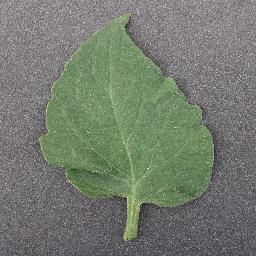

HEALTHY PLANT


In [ ]:
tomato_analysis_pipeline(image_path)

In [ ]:
image_path = '/content/drive/MyDrive/ACPS PROJECT - MSDS/DATASETS/MSDS-Iv3/test/Tomato_Early_blight186.jpg_Horizontally_flip.jpg'

In [ ]:
from PIL import Image
tomato_analysis_pipeline(image_path)

1/1 [==============================] - 0s 26ms/step
[[          1  1.5494e-18  4.4848e-35]]
0
Tomato_Diseased
DISEASED LEAF DETECTED: ACTIVATING STAGE II : DISEASE STAGE DETECTION
No predicted images found.


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.25 source='/content/drive/MyDrive/ACPS PROJECT - MSDS/DATASETS/MSDS-Iv3/test/Tomato_Early_blight186.jpg_Horizontally_flip.jpg'

2024-04-16 16:53:35.015995: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 16:53:35.016070: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 16:53:35.017374: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 16:53:36.064190: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDriv

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.25 source={image_path}

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 212, in entrypoint
    raise argument_error(a)
SyntaxError: 'PROJECT' is not a valid YOLO argument.

    YOLOv8 'yolo' CLI commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of [detect, segment, classify]
                MODE (required) is one of [train, val, predict, export]
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo detect train data=coco128.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo 

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.25 source='/content/drive/MyDrive/ACPS PROJECT - MSDS/DATASETS/MSDS-Iv3/test/Tomato_Early_blight186.jpg_Horizontally_flip.jpg'


2024-04-16 17:53:31.701876: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 17:53:31.701931: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 17:53:31.703184: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 17:53:32.792275: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
image 1/1 /content/drive/MyDrive/ACPS PROJECT - MSDS/DATASETS/MSDS-Iv3/te

In [ ]:
import subprocess
import glob
import cv2
from IPython.display import display, Image

def detect_with_yolov8(image_path):
    # Run YOLOv8 for object detection using subprocess
    command = f"yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.25 source={image_path}"
    subprocess.run(command, shell=True)

    # Get the paths of the predicted images
    predicted_image_paths = glob.glob('runs/detect/predict/*.jpg')

    # Display the predicted images with annotations
    for image_path in predicted_image_paths:
        # Read the image
        img = cv2.imread(image_path)

        # Read the YOLOv8 output text file containing object detections
        with open(image_path.replace('.jpg', '.txt'), 'r') as f:
            lines = f.readlines()

        # Loop through each line (each object detection)
        for line in lines:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            class_id = int(class_id)

            # Calculate bounding box coordinates
            x_center = int(x_center * img.shape[1])
            y_center = int(y_center * img.shape[0])
            box_width = int(width * img.shape[1])
            box_height = int(height * img.shape[0])
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))

            # Draw bounding box and label
            color = (0, 255, 0)  # Green color for the bounding box
            label = f"Class {class_id}"  # You can replace this with actual class names
            cv2.rectangle(img, (x_min, y_min), (x_min + box_width, y_min + box_height), color, 2)
            cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Convert the image to RGB format for display
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        display(Image(data=cv2.imencode('.jpg', img_rgb)[1].tobytes()))

# Example usage:
image_path = '/content/drive/MayurPDrive/ACPS PROJECT - MSDS/DATASETS/MSDS-Iv3/test/Tomato_Early_blight186.jpg_Horizontally_flip.jpg'
detect_with_yolov8(image_path)
